In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from  tensorflow import keras
import seaborn as sns
import smogn
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("D:\\M tech\\Other_project\\Data_set\\creditcard.csv")

In [3]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.drop(columns=['Time'],inplace=True)

In [7]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [19]:
df.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
df.dtypes

V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [25]:
df.shape

(284807, 30)

In [26]:
df=df.drop_duplicates()

In [27]:
df.shape

(275663, 30)

In [30]:
normal=df[df['Class']==0]
froud=df[df['Class']==1]


In [31]:
normal.shape

(275190, 30)

In [32]:
froud.shape

(473, 30)

<AxesSubplot: ylabel='count'>

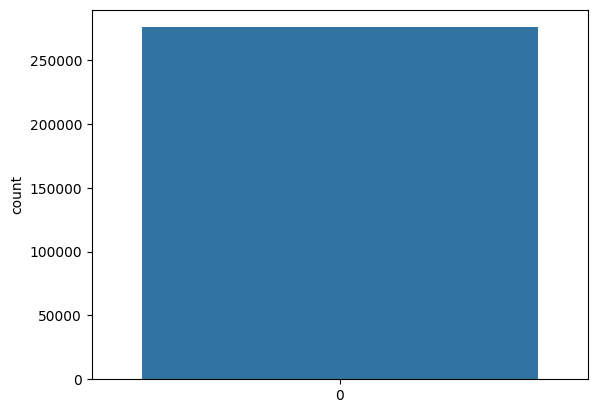

In [28]:
sns.countplot(df['Class'])


In [36]:
x=df.drop(columns=['Class'])
y=df['Class']

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [39]:
scaler =StandardScaler ()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [41]:
#oversampling
from imblearn.over_sampling import SMOTE
x_res,y_res=SMOTE().fit_resample(x_train,y_train)


In [50]:
y_res.value_counts()

0    220148
1    220148
Name: Class, dtype: int64

In [51]:
y_train.value_counts()

0    220148
1       382
Name: Class, dtype: int64

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
model = LogisticRegression(random_state=42)
model.fit(x_res, y_res)


LogisticRegression(random_state=42)

In [53]:
y_pred = model.predict(x_test)

In [59]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.98
Confusion Matrix:
[[53767  1275]
 [   12    79]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     55042
           1       0.06      0.87      0.11        91

    accuracy                           0.98     55133
   macro avg       0.53      0.92      0.55     55133
weighted avg       1.00      0.98      0.99     55133



In [56]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report


In [60]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Precision: 0.06
Recall: 0.87
F1-Score: 0.11


In [61]:
y_pred_proba = model.predict_proba(x_test)[:, 1] 

In [85]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

roc_auc = roc_auc_score(y_test, y_pred_proba)
gini = 2 * roc_auc - 1

# Print the results
print(f"ROC AUC: {roc_auc:.2f}")
print(f"Gini Coefficient: {gini:.2f}")

ROC AUC: 0.97
Gini Coefficient: 0.94


In [86]:
# Compute ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)


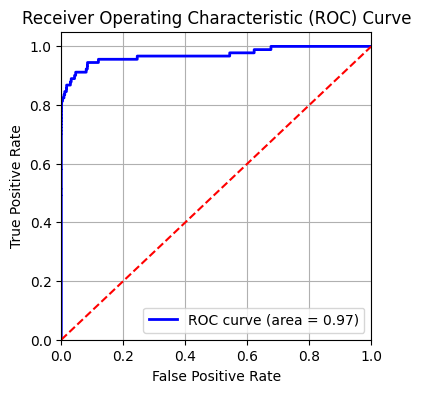

In [89]:
# Plot ROC Curve
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



In [90]:
# Create a DataFrame with predicted probabilities and actual values
df_test = pd.DataFrame({'actual': y_test, 'predicted_proba': y_pred_proba})

# Define deciles
df_test['decile'] = pd.qcut(df_test['predicted_proba'], 10, labels=False)

# Calculate the count of positive and negative cases and rate of positive class for each decile
decile_summary = df_test.groupby('decile').agg(
    total_count=('actual', 'size'),
    positive_count=('actual', 'sum'),
    negative_count=('actual', lambda x: (x == 0).sum())
).reset_index()

# Calculate rate of positive class within each decile
decile_summary['positive_class_rate'] = decile_summary['positive_count'] / decile_summary['total_count']

# Rank deciles based on positive class rate
decile_summary['rank'] = decile_summary['positive_class_rate'].rank(ascending=False, method='min').astype(int)

# Sort by rank
decile_summary = decile_summary.sort_values('rank').reset_index(drop=True)

# Display rank order table
print("Rank Order Table:")
print(decile_summary[['decile', 'positive_count', 'negative_count', 'positive_class_rate', 'rank']])

Rank Order Table:
   decile  positive_count  negative_count  positive_class_rate  rank
0       9              86            5428             0.015597     1
1       3               2            5511             0.000363     2
2       7               1            5512             0.000181     3
3       8               1            5512             0.000181     3
4       4               1            5513             0.000181     5
5       0               0            5514             0.000000     6
6       1               0            5513             0.000000     6
7       2               0            5513             0.000000     6
8       5               0            5513             0.000000     6
9       6               0            5513             0.000000     6


In [94]:
ninth_decile_data = df_test[df_test['decile'] == 9]
# Print the 9th decile data
print("Data for the 9th Decile:")
print(ninth_decile_data)


Data for the 9th Decile:
        actual  predicted_proba  decile
284264       0         0.425873       9
134035       0         0.698651       9
217689       0         0.288063       9
44005        0         0.241360       9
158834       0         0.250863       9
...        ...              ...     ...
169543       0         0.468616       9
180698       0         0.729749       9
70149        0         0.488707       9
144853       0         0.216409       9
178615       0         0.496951       9

[5514 rows x 3 columns]


In [96]:
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [98]:
# Initialize and train the Decision Tree model
model = DecisionTreeClassifier( )
model.fit(x_res, y_res)

DecisionTreeClassifier()

In [99]:
# Predict on the test set
y_pred = model.predict(x_test)
y_pred_proba = model.predict_proba(x_test)[:, 1]  # Probability of the positive class


In [100]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55042
           1       0.37      0.74      0.50        91

    accuracy                           1.00     55133
   macro avg       0.69      0.87      0.75     55133
weighted avg       1.00      1.00      1.00     55133



In [101]:
# Compute ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

ROC AUC Score: 0.8671


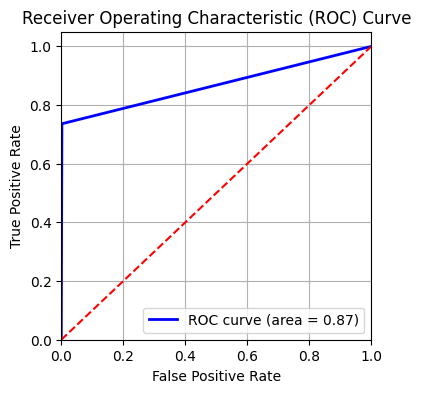

In [104]:
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


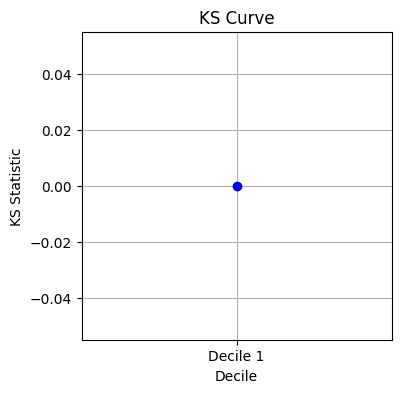

In [110]:
# Create a DataFrame with predicted probabilities and actual values
df_test = pd.DataFrame(x_test, columns=[f'feature_{i}' for i in range(x_test.shape[1])])
df_test['actual'] = y_test
df_test['predicted_proba'] = y_pred_proba

# Define deciles with handling non-unique bin edges
df_test['decile'] = pd.qcut(df_test['predicted_proba'], 10, labels=False, duplicates='drop')

# Calculate the number of positive and negative cases in each decile
decile_summary = df_test.groupby('decile').agg(
    total_count=('actual', 'size'),
    positive_count=('actual', 'sum'),
    negative_count=('actual', lambda x: (x == 0).sum())
).reset_index()

# Calculate cumulative values
decile_summary = decile_summary.sort_values('decile')
decile_summary['cumulative_total'] = decile_summary['total_count'].cumsum()
decile_summary['cumulative_positive'] = decile_summary['positive_count'].cumsum()
decile_summary['cumulative_negative'] = decile_summary['negative_count'].cumsum()

total_positives = decile_summary['positive_count'].sum()
total_negatives = decile_summary['negative_count'].sum()
total_count = total_positives + total_negatives

decile_summary['cumulative_positive_rate'] = decile_summary['cumulative_positive'] / total_positives
decile_summary['cumulative_negative_rate'] = decile_summary['cumulative_negative'] / total_negatives

# Calculate the KS statistic
decile_summary['KS'] = decile_summary['cumulative_positive_rate'] - decile_summary['cumulative_negative_rate']

# Plot the KS Curve
plt.figure(figsize=(4, 4))
plt.plot(decile_summary['decile'] + 1, decile_summary['KS'], marker='o', linestyle='-', color='blue')
plt.title('KS Curve')
plt.xlabel('Decile')
plt.ylabel('KS Statistic')
plt.xticks(ticks=np.arange(1, len(decile_summary['decile'].unique()) + 1), labels=[f'Decile {i}' for i in range(1, len(decile_summary['decile'].unique()) + 1)])
plt.grid(True)
plt.show()